# Instructions

* The assignment is due in one week.
* Provide some short comments/documentation for your code. This makes it easier to understand and grade.
* In the cell below, please provide a breakdown of individual contributions. For example, Person XYZ worked on problems 5-10, etc.

*Breakdown of individual contributions:

Vi Q1-3

Alyssa Q4-6

Haoliang (Jack) Q7-9

Willy Q10-12

We all met twice to discuss all the questions and help each other debug the code.

---

# New York City Restaurant Inspections

We will analyze restaurant inspections in New York City, starting November 1, 2014 and ending January 31, 2015. 
The data is in the file <a href="NYC_Restaurants.csv">NYC_Restaurants.csv</a>.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# The dtype=str tells Pandas to load in all columns as strings.
# I do this because I know they are strings, and Pandas doesn't have to spend time figuring out the column dtypes.
df = pd.read_csv('https://raw.githubusercontent.com//wresendiz1/MIS-373/main/NYC_Restaurants.csv', dtype=str)

#### [Q1, 7 points] Create a unique name for each restaurant.
On the DataFrame created above, add a new column to your DataFrame called 'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example:
<pre>WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN</pre>

Print the first 10 values of the RESTAURANT column of your DataFrame.

In [3]:
df_hw = df.copy()
df_hw['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

# for use on Q9 since we do not want to drop duplicates
df_rest = df_hw.copy()

# for use on problems where we need to have unique restuarants
df_hw = df_hw.drop_duplicates('RESTAURANT')


df_hw['RESTAURANT'][:10]

0            WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5         TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9     BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
16    MAY MAY KITCHEN 1269 SUTTER AVENUE 11208 BROOKLYN
22         SEUDA FOODS 705 KINGS HIGHWAY 11223 BROOKLYN
24    CARVEL ICE CREAM 203 CHURCH AVENUE 11218 BROOKLYN
26       NORDIC DELICACIES 6909 3 AVENUE 11209 BROOKLYN
30    GLORIOUS FOOD 522 EAST   74 STREET 10021 MANHA...
31    THE MOVABLE FEAST 284 PROSPECT PARK WEST 11215...
34            BULLY'S DELI 759 BROADWAY 10003 MANHATTAN
Name: RESTAURANT, dtype: object

#### [Q2, 7 points] How many restaurants are included in the data?
Careful now:

*  A *Subway* in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [4]:
#Cleaned the duplicating restaurants in df_hw
#Now we don't have to use remove_duplicate function for later questions
print("There are {} unique restaurants in the dataset.".format(len(df_hw)))

There are 10114 unique restaurants in the dataset.


#### [Q3, 7 points] How many chains are there?
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [5]:
chain = df_hw['DBA'].value_counts()
num_chains = len(chain[chain > 1])
print("There are {} chains in the dataset.".format(num_chains))

There are 368 chains in the dataset.


#### [Q4, 7 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

<AxesSubplot:title={'center':'Top 20 Chains in NYC'}>

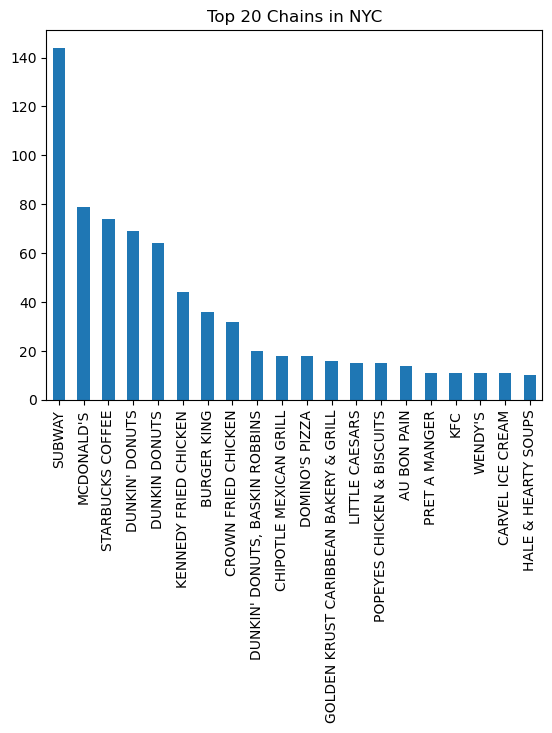

In [6]:
chain[chain > 1].iloc[:20].plot(kind = 'bar', title='Top 20 Chains in NYC')

#### [Q5, 7 points] What fraction of all restaurants are chain restaurants?

You should think of a restaurant as being one restaurant at one location.
So *Wendy's 5th Street* and *Wendy's on 10th Street* are two different restaurants.
Essentially a restaurant is what you defined in Q1.

In [7]:
# divide the sum of all chains by the total number of restaurants
frac = chain[chain > 1].sum() / df_hw['RESTAURANT'].value_counts().sum()

print("Chains make up {0:.4f} of all restaurants in this dataset.".format(frac))

Chains make up 0.1647 of all restaurants in this dataset.


#### [Q6, 7 points] Plot the number of non-chain restaurants in each boro.

We need several steps:
* Figure out all the non-chain restaurants.
* Then elect out only those restaurants.
* Finally plot the number of such restaurants by boro. 
* Make sure to look at the plot; we don't want to see... oh... the *missing* boro.

<AxesSubplot:>

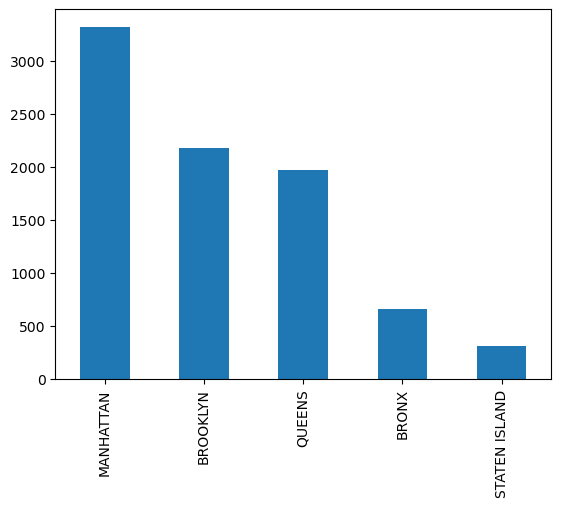

In [8]:
# Remove missing values from the BORO column
df_hw = df_hw[df_hw['BORO'] != 'Missing'] 

# Get the names of the non-chain restaurants
chain_count = df_hw['DBA'].value_counts()
nonchain = chain_count[chain_count < 2].index.tolist()

# Create a mask to filter out all the chain restaurants
def chain_or_not(row):
  name = row["DBA"]
  if name in nonchain:
    return True
  else:
    return False

# Apply the mask and plot the graph
nochain_mask = df_hw.apply(chain_or_not, axis = 1)
df_hw[nochain_mask]['BORO'].value_counts().plot(kind = 'bar')

#### [Q7, 10 points] Plot the *fraction* of non-chain restaurants in each boro.
The boro with the most non-chain restaurants might just be the boro
with the most restaurants in general.

If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

No, the borough with the most independent restaurants is Manhattan while the borough with the highest ratio of independent restaurants is Brooklyn.


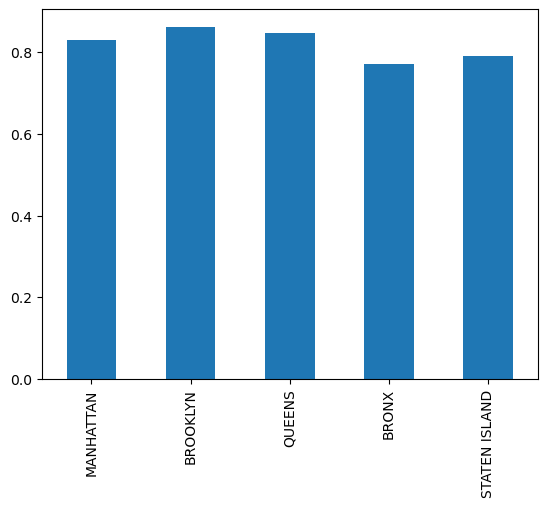

In [9]:
(df_hw[nochain_mask]['BORO'].value_counts() / df_hw['BORO'].value_counts()).plot(kind = 'bar')

print('No, the borough with the most independent restaurants is Manhattan while the borough with the highest ratio of independent restaurants is Brooklyn.')

#### [Q8, 7 points] Plot the popularity of cuisines.
Which cuisines are the most well-represented among all restaurants?

* Define the popularity of a cuisine as the number of restaurants serving that cuisine.
* Plot the popularity of the top 20 cuisines.

<AxesSubplot:title={'center':'Top 20 Most Popular Cuisines'}>

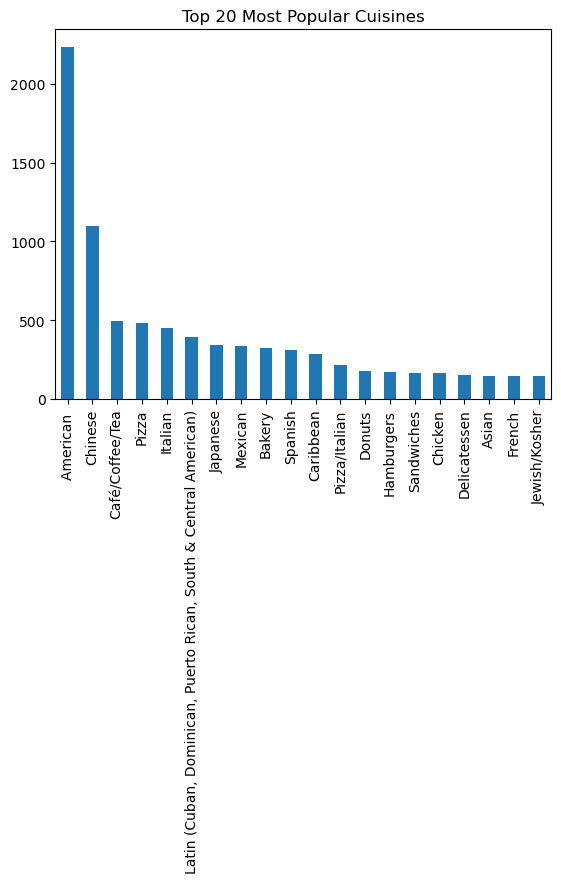

In [10]:
df_hw['CUISINE DESCRIPTION'].value_counts().iloc[:20].plot(kind = 'bar', title = 'Top 20 Most Popular Cuisines')

#### [Q9, 12 points] Plot the cuisines among restaurants which do not get cited for violations.
Ideally, you should explore and see what happens when there is no
violation, but here I will just tell you: the 'VIOLATION CODE' field
is missing.

* Select only the *RESTAURANT* and *CUISINE DESCRIPTION* columns of the DataFrame (we created the *RESTAURANT* column in an earlier question).
* Select the instances where a restaurant did not get cited.
* If a restaurant-cuisine combination was inspected but not cited multiple times, retain only one instance of it.
* Among these instances, how frequent is each of the cuisines?
* Plot the frequencies of the top-20 among these cuisines.

<AxesSubplot:title={'center':'Top 20 Most Popular Cuisines of Restaurants with No Violations'}>

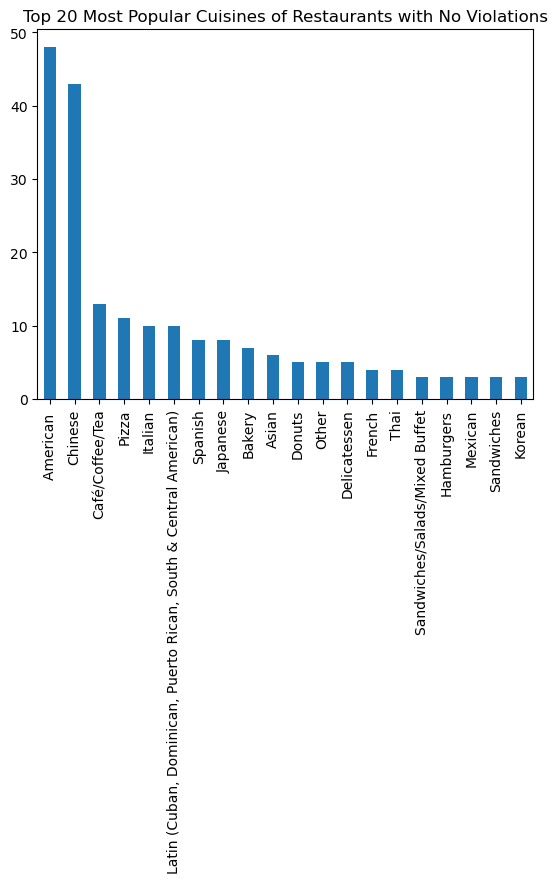

In [30]:
# create frequency table for violations, 
# no need to specify values like pivot table, automatically finds the sum of all occurances
cross = pd.crosstab(df_rest["RESTAURANT"], df_rest["ACTION"])

# create df to record restaurants with no violations
no_violations = pd.DataFrame(columns=['RESTAURANT'])

# iterate through each restaurant and calculate if there are no violations
# add restaurants with no violations to df
for i in range(len(cross)):
    #Check if the sum of the row only includes the value from no violations
    if cross.iloc[i].sum() - cross.iloc[i, 3] == 0:
      #cross.index[i] gives the restaurant
      #here we assign the next row (empty) to be the clean restaurant 
      no_violations.loc[len(no_violations)] = cross.index[i] 

# Find cuisine description by joining tables
no_violations = pd.merge(no_violations, df_hw[["RESTAURANT", "CUISINE DESCRIPTION"]], on="RESTAURANT")

no_violations['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind='bar',
                                                              title = 'Top 20 Most Popular Cuisines of Restaurants with No Violations')

#### [Q10, 7 points] What cuisines tend to be the "cleanest"?

* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants with at least one non-citation, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are "most likely to be clean."

In [31]:
# Get count of cuisines based on all resturants 
series_all = df_hw['CUISINE DESCRIPTION'].value_counts()

# Select only cuisines with at least 20 restaurants representing them
series_all = series_all[series_all >= 20]

# Get count of cuisines based only on resturants that have no citations
series_no_citation = no_violations['CUISINE DESCRIPTION'].value_counts()

# Find the ratio of clean cuisines
series_ratio = series_no_citation/series_all

# Remove cuisines with no clean restuarants (showing NaN)
series_ratio = series_ratio.dropna()

print('Below are the top-10 cusines that are most likely to be clean: \n')
series_ratio.sort_values(ascending=False).iloc[:10]


Below are the top-10 cusines that are most likely to be clean: 



Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.048544
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.039198
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

#### [Q11, 10 points] What are the most common violations in each  borough?

* Create a table of the number of times each violation description was observed in each borough.
    * To create the table, check out the `crosstab` function. We will see a more general version of this when we discuss `groupby` in class.
    * Alternatively, you can create a dummy column, fill it with just the number 1, and use `pivot_table` (figure out what *aggfunc* should be).
* Figure out the most common violation description for each borough.

In [14]:
#Creates a matrix based on all violations, so using the df table here not df_hw (have duplicate records removed)
df_dummy = df.copy()
df_dummy['DUMMY'] = 1

#Creates the pivot table that shows the sum of each violation in each borough
pivoted = pd.pivot_table(df_dummy,
                        index='VIOLATION DESCRIPTION',
                        columns='BORO',
                        values = 'DUMMY',
                        aggfunc= sum
                        )

# remove the 'missing' column 
pivoted = pivoted.drop('Missing', axis=1)
pivoted

BORO,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
VIOLATION DESCRIPTION,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12.0,40.0,49.0,29.0,5.0
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1.0,5.0,6.0,4.0,1.0
''''Wash hands sign not posted at hand wash facility.,21.0,57.0,93.0,60.0,8.0
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5.0,12.0,19.0,24.0,3.0
Accurate thermometer not provided in refrigerated or hot holding equipment.,21.0,76.0,98.0,92.0,16.0
...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2.0,3.0,11.0,3.0,1.0
Toilet facility used by women does not have at least one covered garbage receptacle.,1.0,5.0,7.0,2.0,1.0
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2.0,8.0,15.0,20.0,3.0


In [15]:
#Now we need to figure out how to find only the most common violation for each borough
pivoted.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

#### [Q12,12 points] What are the most common violations per borough, *after normalizing for the relative abundance of each violation?*

Hopefully, the answer to the previous question left you unsatisfied,
because some violations are just very common, irrespective of borough.
A better approach would be to **normalize** the violation counts, as
follows.

* **Get overall frequencies:** Figure out how common each violation is, over the entire dataset; let's call this <tt>violationFrequency</tt>.
* **Normalize:** Consider the table of number of violations by borough that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by <tt>violationFrequency</tt>. We want to do this **for each borough**.
* **Find the biggest violations:** After this normalization, for each borough, figure out the most common violation description.

In [16]:
violationFrequency = df["VIOLATION DESCRIPTION"].value_counts()
pivoted2 = pivoted.T
pivoted2 = pivoted2[pivoted2.index != 'Missing']

# iterate through each borough
for boro, desc in pivoted2.iterrows():
    common_count = 0
    common_desc = ''
    counts = []
    # for each borough calculate the normalized frequencies and get the most common violations
    # desc.index gives the violation descriptions in a list-like index format
    # boro does not need to be transformed because it is the row and we are doing iterrows()
    for desc2 in desc.index:
        # calculate the normalized frequency
        temp = pivoted2.loc[boro][desc2] / violationFrequency[desc2]
        # store the current violation with the highest normalized frequency
        if temp > common_count:
            common_count = temp
            common_desc = desc2
            counts.clear()
            counts.append([common_count, common_desc])
        # if a borough has violations that occur with the same normalized frequencies then we store both of them
        elif temp == common_count:
          common_desc = desc2
          counts.append([common_count, common_desc])
  
    #counts is a 2D list
    for item in counts:
      print(boro, item[1], item[0], '\n')

BRONX Unprotected food re-served. 0.5 

BROOKLYN Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours. 0.7142857142857143 

MANHATTAN Out-of package sale of tobacco products observed. 1.0 

MANHATTAN Potable water supply inadequate. Water or ice not potable or from unapproved source.  Cross connection in potable water supply system observed. 1.0 

QUEENS Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes. 1.0 

QUEENS Harmful, noxious gas or vapor detected. CO ~1 3 ppm. 1.0 

QUEENS Raw food not properly washed prior to serving. 1.0 

STATEN ISLAND Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized. 0.09090909090909091 

